# Objective:
## To create a group of high valued customers and analyze the trends in their Demographic and Geographical attributes to know the common behavior and create a strategy (a set of certain attributes) to target new customers.

# Importing required libraries and reading datasets into data frames

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use(['ggplot'])

In [2]:
tr = pd.read_excel( 'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', skiprows=range(1) )
print ('Transactions read into a pandas dataframe!')

de = pd.read_excel( 'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', skiprows=range(1) )
print ('CustomerDemographic read into a pandas dataframe!')

add = pd.read_excel( 'KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', skiprows=range(1) )
print ('CustomerAddress read into a pandas dataframe!')

Transactions read into a pandas dataframe!
CustomerDemographic read into a pandas dataframe!
CustomerAddress read into a pandas dataframe!


# Dataset 1 - Transactions

Through transactions data, we are creating a list of customer ids having their individual transaction values greater than average of list_price of whole dataset. This way we are trying to find trends in upper half of the value segment.

In [3]:
tr.shape

(20000, 13)

In [4]:
tr['group'] = tr['list_price'].apply(lambda x: 'Above average' if x >= (tr['list_price'].mean()) else 'Below average')

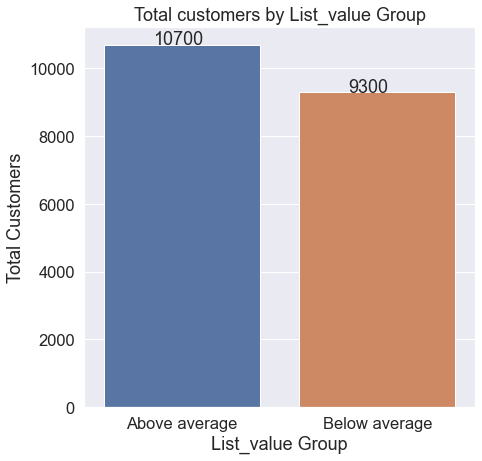

In [5]:
group_counts = tr["group"].value_counts().rename_axis('List_value Group').reset_index(name='counts')
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
g = sns.barplot('List_value Group', 'counts', data=group_counts)
g.set(xlabel='List_value Group', ylabel='Total Customers')
plt.title('Total customers by List_value Group')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1) )

plt.savefig("CstByListValue.png", bbox_inches='tight', dpi=300)

In [6]:
tr = tr[tr['list_price'] >= tr['list_price'].mean()]
tr.shape

(10700, 14)

In [7]:
cst_ids = list(tr['customer_id'])

# Dataset 2 - Customer Demographic

Now, we will only take demographic details of the customers who are in our observation list and dug out characteristic trends based on Age, Gender, and Industry category.

In [8]:
de.shape

(4000, 13)

In [9]:
de = de[de['customer_id'].isin(cst_ids)]
de.shape

(3332, 13)

In [10]:
de['gender'].value_counts()

Female    1673
Male      1580
U           76
Femal        1
F            1
M            1
Name: gender, dtype: int64

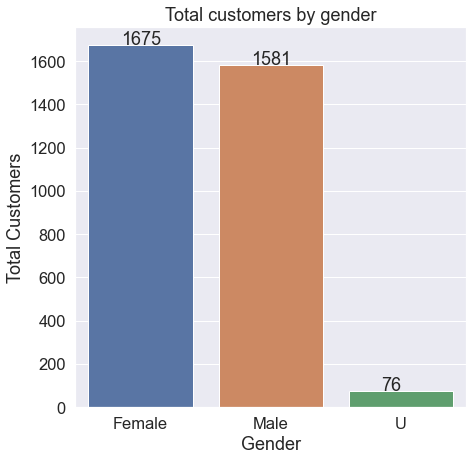

In [11]:
de['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
de['gender'].replace('M', 'Male', inplace=True)

gender_counts = de["gender"].value_counts().rename_axis('gender').reset_index(name='counts')
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
g = sns.barplot('gender', 'counts', data=gender_counts)
g.set(xlabel='Gender', ylabel='Total Customers')
plt.title('Total customers by gender')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1) )

plt.savefig("CstByGen.png", bbox_inches='tight', dpi=300)

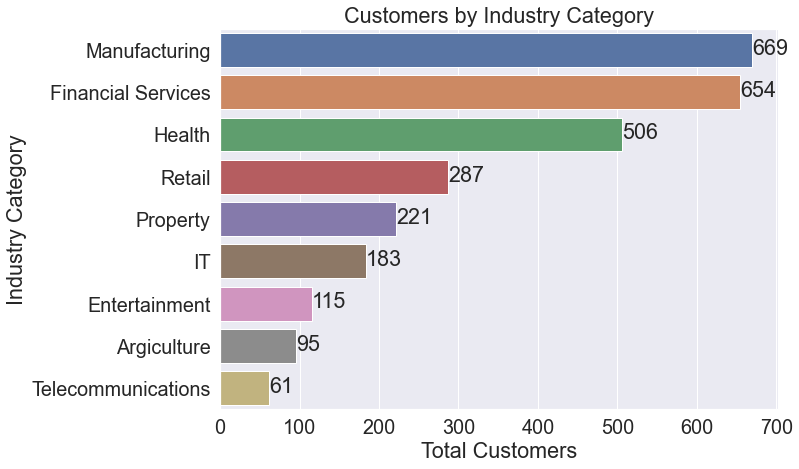

In [12]:
category_counts = de["job_industry_category"].value_counts().rename_axis('cat').reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.set(font_scale=1.8)
g = sns.barplot(y = 'cat', x = 'counts', data=category_counts)
g.set(xlabel='Total Customers', ylabel='Industry Category')
plt.title('Customers by Industry Category')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+0.2, p.get_y() +0.5) )
        
plt.savefig("CstByCat.png", bbox_inches='tight', dpi=300)

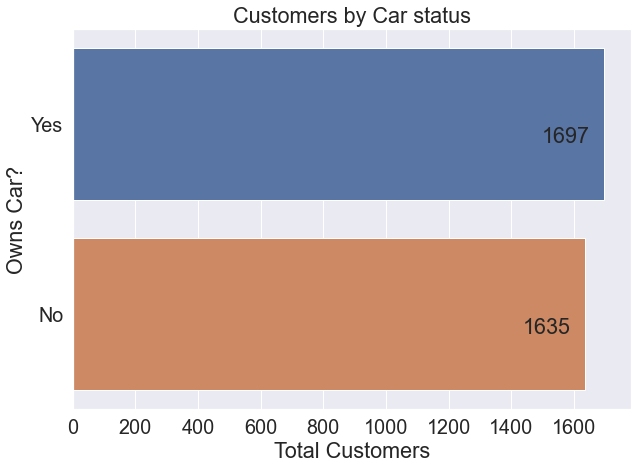

In [13]:
car_counts = de["owns_car"].value_counts().rename_axis('owns_car').reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.set(font_scale=1.8)
g = sns.barplot(y = 'owns_car', x = 'counts', data=car_counts)
g.set(xlabel='Total Customers', ylabel='Owns Car?')
plt.title('Customers by Car status')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_width()), (p.get_width()-200, p.get_y() +0.5) )
        
plt.savefig("CstByCar.png", bbox_inches='tight', dpi=300)

# Dataset 3 - Customer Address

In [14]:
add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [15]:
add = add[add['customer_id'].isin(cst_ids)]
add.shape

(3328, 6)

In [16]:
add['state'].value_counts()

NSW                1693
VIC                 760
QLD                 711
New South Wales      84
Victoria             80
Name: state, dtype: int64

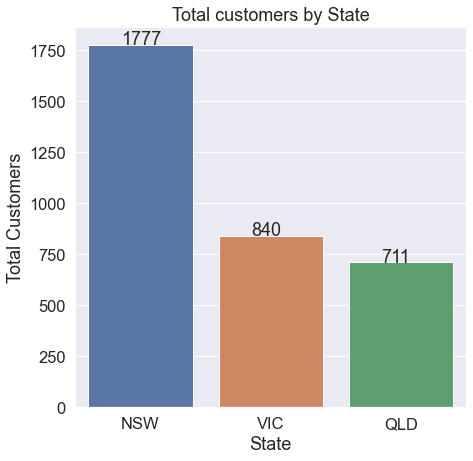

In [17]:
add['state'].replace('New South Wales', 'NSW', inplace=True)
add['state'].replace('Victoria', 'VIC', inplace=True)

state_counts = add['state'].value_counts().rename_axis('state').reset_index(name='counts')
plt.figure(figsize=(7,7))
sns.set(font_scale=1.5)
g = sns.barplot('state', 'counts', data=state_counts)
g.set(xlabel='State', ylabel='Total Customers')
plt.title('Total customers by State')
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1) )
        
plt.savefig("CstByState.png", bbox_inches='tight', dpi=300)

# 4. Conclusion:

---
## **Observing the customer demographic trends for the above average group, we can say that we should:**

**- Focus more on female for advertising in general, but will have to check for reverse behavior in specific age group if any.**     
**- Only target customers from 3 industry categories: Manufacturing, Financial Services, and Health**     
**- Owning a car or not merely makes any difference, so we should not criticize on this criteria.**

___

---
## **Observing the customer address dataset for the above average group, we can say that we should:**

**- Focus more on advertising customers in New South Wales and also check if we have any other advantage for this group.**     
**- For a better marketing GAIN, we should not advertise in VIC and QLD.**     

___